In [1]:
import pyarrow
import pandas as pd
import pylab as plt
import simweights
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl

from icecube.icetray import I3Tray
from icecube import icetray, phys_services, dataio, dataclasses,MuonGun

In [2]:
##airshowered corsika files
trigger_path = '/data/user/zrechav/compiled_hdf5s/L2_Corsika_sample_comparison/22803_trigger_10files.hdf5'
L2_path = '/data/user/zrechav/compiled_hdf5s/L2_Corsika_sample_comparison/22803_L2_10files.hdf5'
prop_L2_path = '/data/user/zrechav/compiled_hdf5s/L2_Corsika_sample_comparison/presample_22803_L2_10files.hdf5'

In [3]:
##trigger level information
hdffile = pd.HDFStore(trigger_path, "r")
weighter = simweights.CorsikaWeighter(hdffile, nfiles=10)
flux = simweights.GaisserH4a()
pweights = weighter.get_weights(flux)

pmultiplicity = (hdffile['MuonMultiplicity'].value)
pprimary_energy = (hdffile['PolyplopiaPrimary']['energy'])
pprimary_zenith = (hdffile['PolyplopiaPrimary']['zenith'])
pprimary_azimuth = (hdffile['PolyplopiaPrimary']['azimuth'])
pneutrino_energy = hdffile['shower_neutrino_energy'].value
pneutrino_zenith = hdffile['shower_neutrino_zenith'].value
pneutrino_depth = hdffile['shower_neutrino_depth'].value
ptotal_muon_energy = hdffile['Total_Muon_Energy'].value
#ptotal_neutrino_energy = hdffile['total_neutrino_energy'].value
#pdaughter_neutrino_energy = hdffile['daughter_neutrino_energy'].value
peventheader = hdffile['I3EventHeader'].SubEvent

In [4]:
##L2 level information
hdffile = pd.HDFStore(L2_path, "r")
weighter = simweights.CorsikaWeighter(hdffile, nfiles=10)
flux = simweights.GaisserH4a()
weights = weighter.get_weights(flux)

multiplicity = (hdffile['MuonMultiplicity'].value)
primary_energy = (hdffile['PolyplopiaPrimary']['energy'])
primary_zenith = (hdffile['PolyplopiaPrimary']['zenith'])
primary_azimuth = (hdffile['PolyplopiaPrimary']['azimuth'])
neutrino_energy = hdffile['shower_neutrino_energy'].value
neutrino_zenith = hdffile['shower_neutrino_zenith'].value
neutrino_depth = hdffile['shower_neutrino_depth'].value
total_muon_energy = hdffile['Total_Muon_Energy'].value
total_neutrino_energy = hdffile['total_neutrino_energy'].value
daughter_neutrino_energy = hdffile['daughter_neutrino_energy'].value
eventheader = hdffile['I3EventHeader'].SubEvent
#qtot = hdffile['Homogenized_QTot'].value

In [5]:
##presampled L2 level information
hdffile = pd.HDFStore(prop_L2_path, "r")
weighter = simweights.CorsikaWeighter(hdffile, nfiles=10)
flux = simweights.GaisserH4a()
tweights = weighter.get_weights(flux)

#tmultiplicity = (hdffile['MuonMultiplicity'].value)
tprimary_energy = (hdffile['PolyplopiaPrimary']['energy'])
tprimary_zenith = (hdffile['PolyplopiaPrimary']['zenith'])
tprimary_azimuth = (hdffile['PolyplopiaPrimary']['azimuth'])
# tneutrino_energy = hdffile['shower_neutrino_energy'].value
# tneutrino_zenith = hdffile['shower_neutrino_zenith'].value
# tneutrino_depth = hdffile['shower_neutrino_depth'].value
# ttotal_muon_energy = hdffile['Total_Muon_Energy'].value
ttotal_neutrino_energy = hdffile['total_neutrino_energy'].value

teventheader = hdffile['I3EventHeader'].SubEvent
#qtot = hdffile['Homogenized_QTot'].value

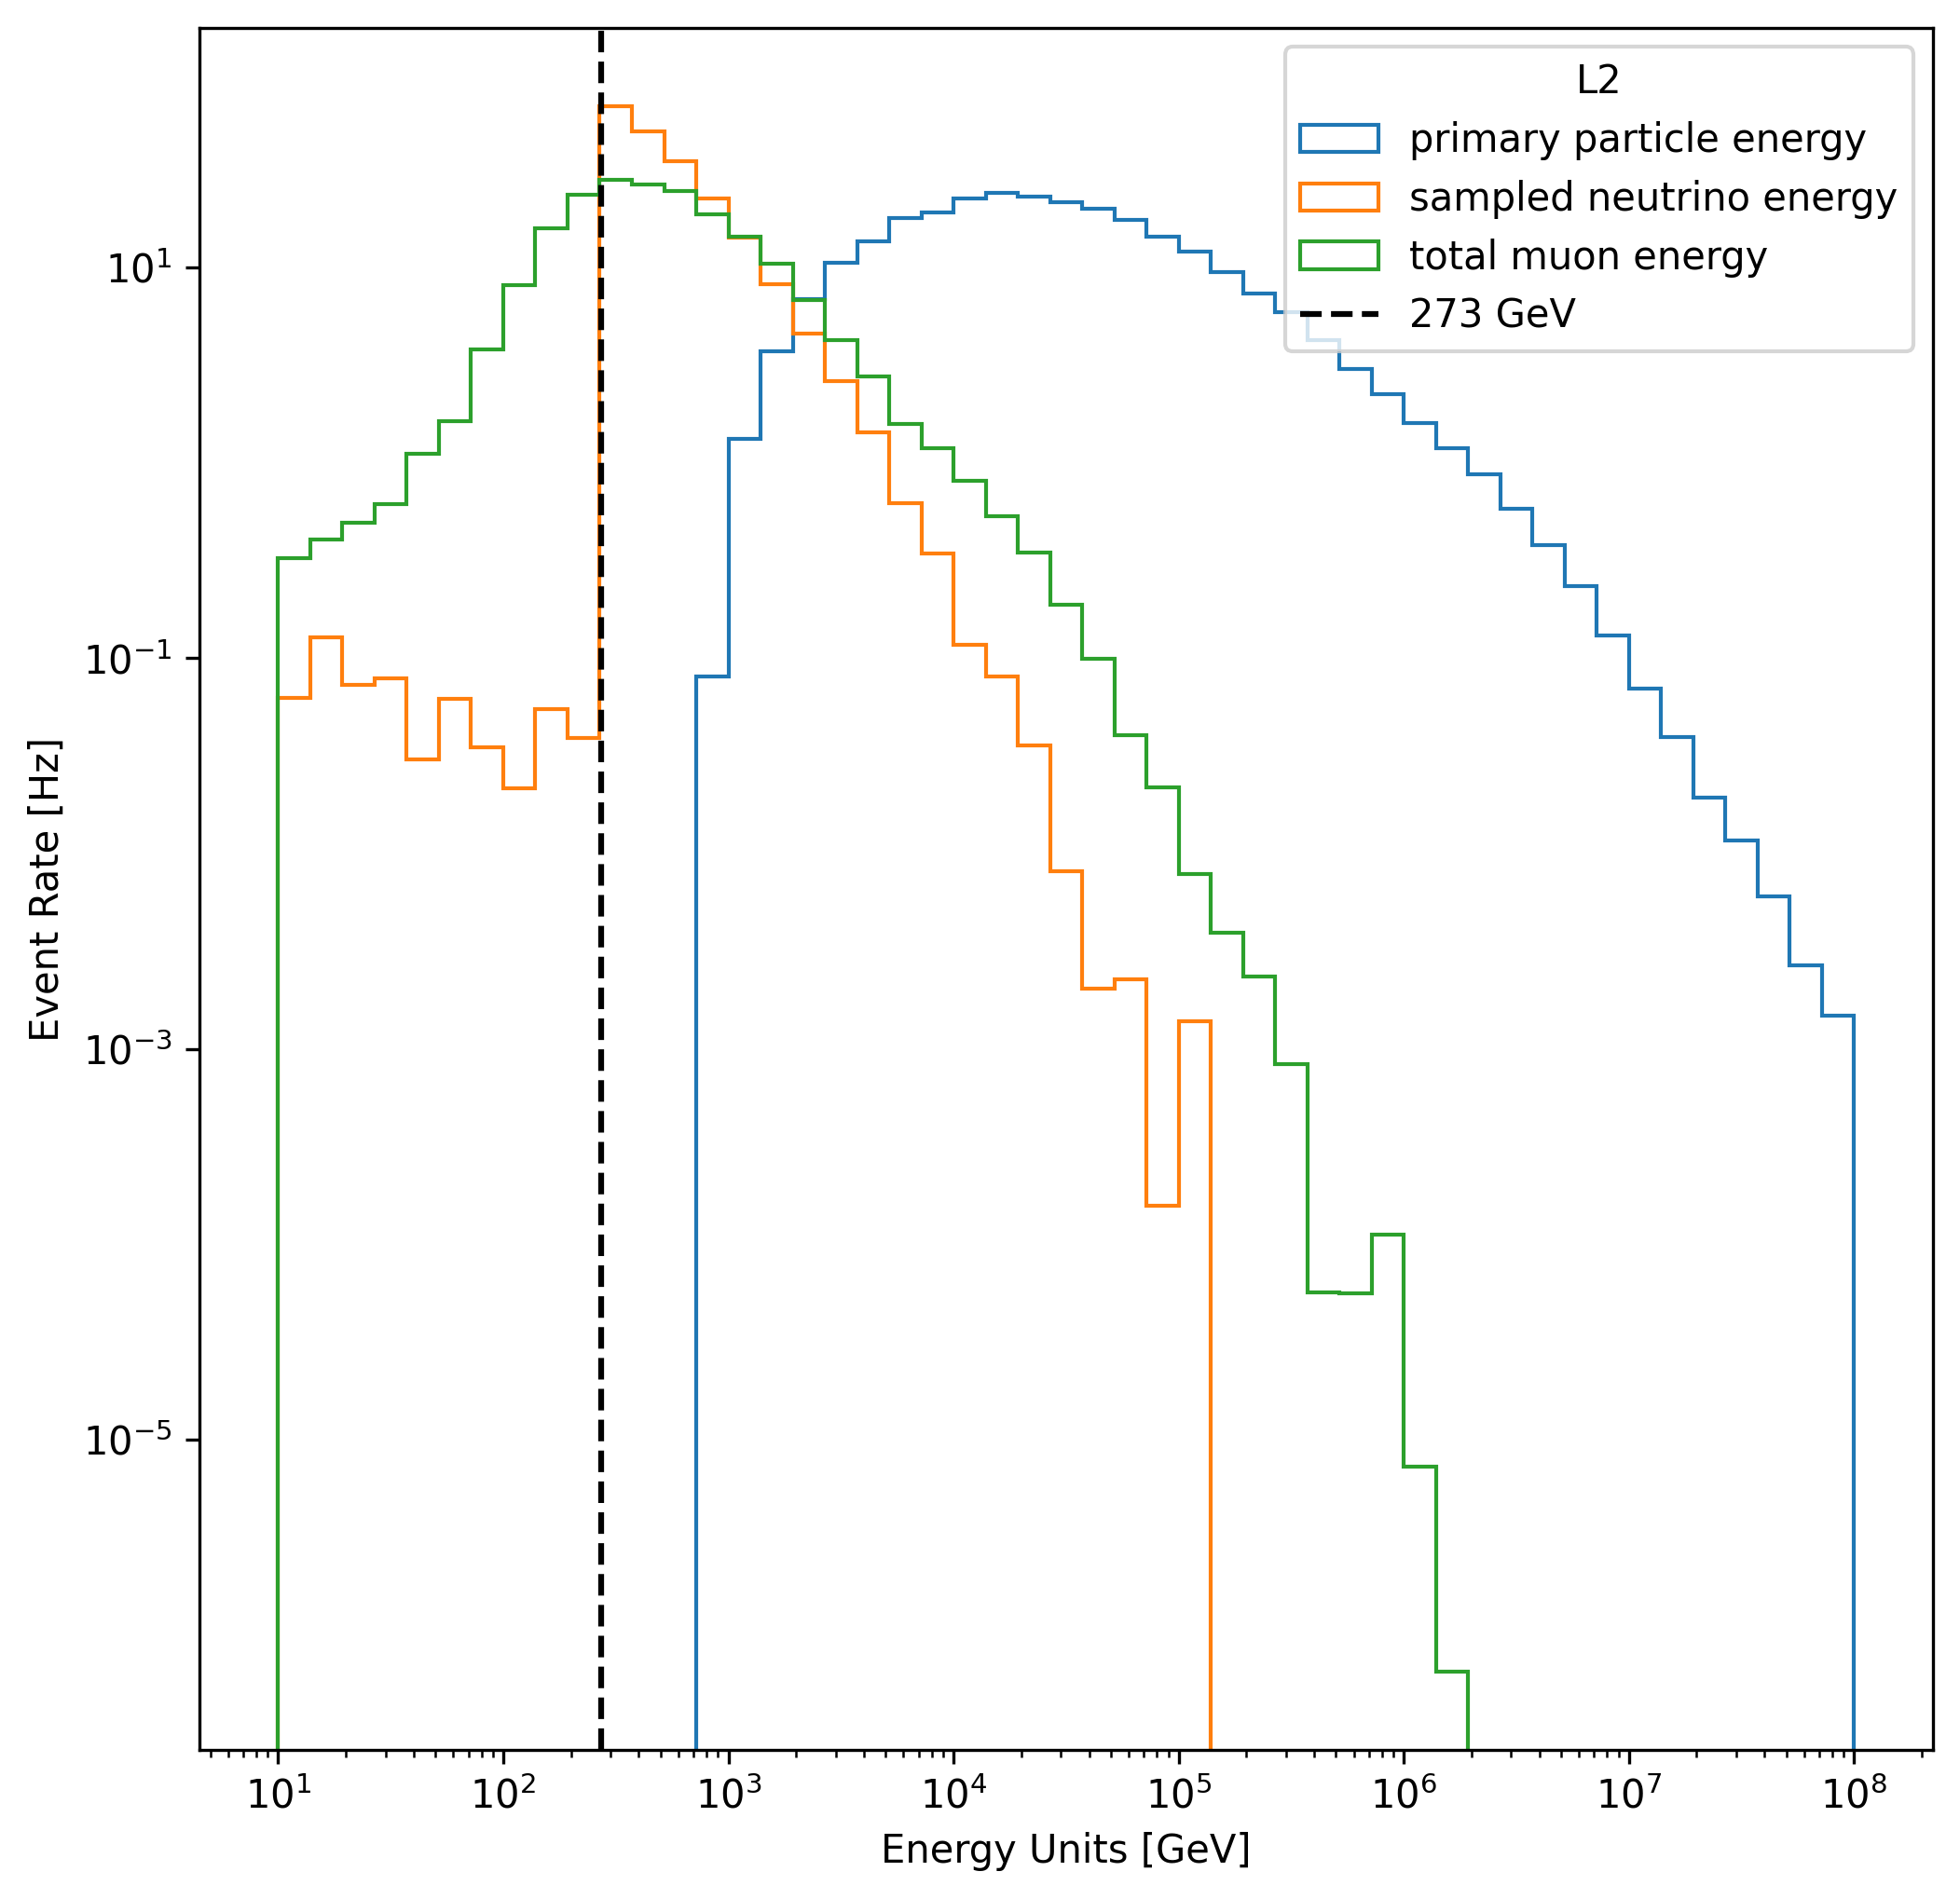

In [7]:
bins = np.logspace(1, 8, 50)
bin_centers =np.sqrt(bins[:-1] * bins[1:])
multiplicity_mask = [val < 2 for val in multiplicity]
pmultiplicity_mask = [val < 2 for val in pmultiplicity]
#energy_mask = [val < 10**8 for val in neutrino_energy]
fig,ax = plt.subplots(figsize=(8,8),dpi=300)

plt.hist(primary_energy, weights=weights, bins=bins,histtype = 'step', 
        label = 'primary particle energy')


plt.hist(neutrino_energy, weights=weights, 
        bins=bins,histtype = 'step',
         label = 'sampled neutrino energy')
plt.hist(total_muon_energy, weights=weights, 
           bins=bins,histtype = 'step',
           label = 'total muon energy')

# plt.hist(ptotal_muon_energy, weights=pweights, 
#           bins=bins,histtype = 'step',
#           label = 'trigger total muon energy')
plt.axvline(273,color='k',linestyle='dashed',label='273 GeV')

plt.loglog()
plt.xlabel("Energy Units [GeV]")
plt.ylabel("Event Rate [Hz]")
#plt.xlim(273)
#plt.ylim(10**-4,10**2)
plt.legend(title = 'L2',loc='upper right')
plt.show()

/tmp/ipykernel_7615/1397829711.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(np.histogram(neutrino_energy, bins=bins, weights=weights)[0],
/tmp/ipykernel_7615/1397829711.py:8: RuntimeWarning: invalid value encountered in divide
  pratio = np.divide(np.histogram(pneutrino_energy, bins=bins, weights=pweights)[0],


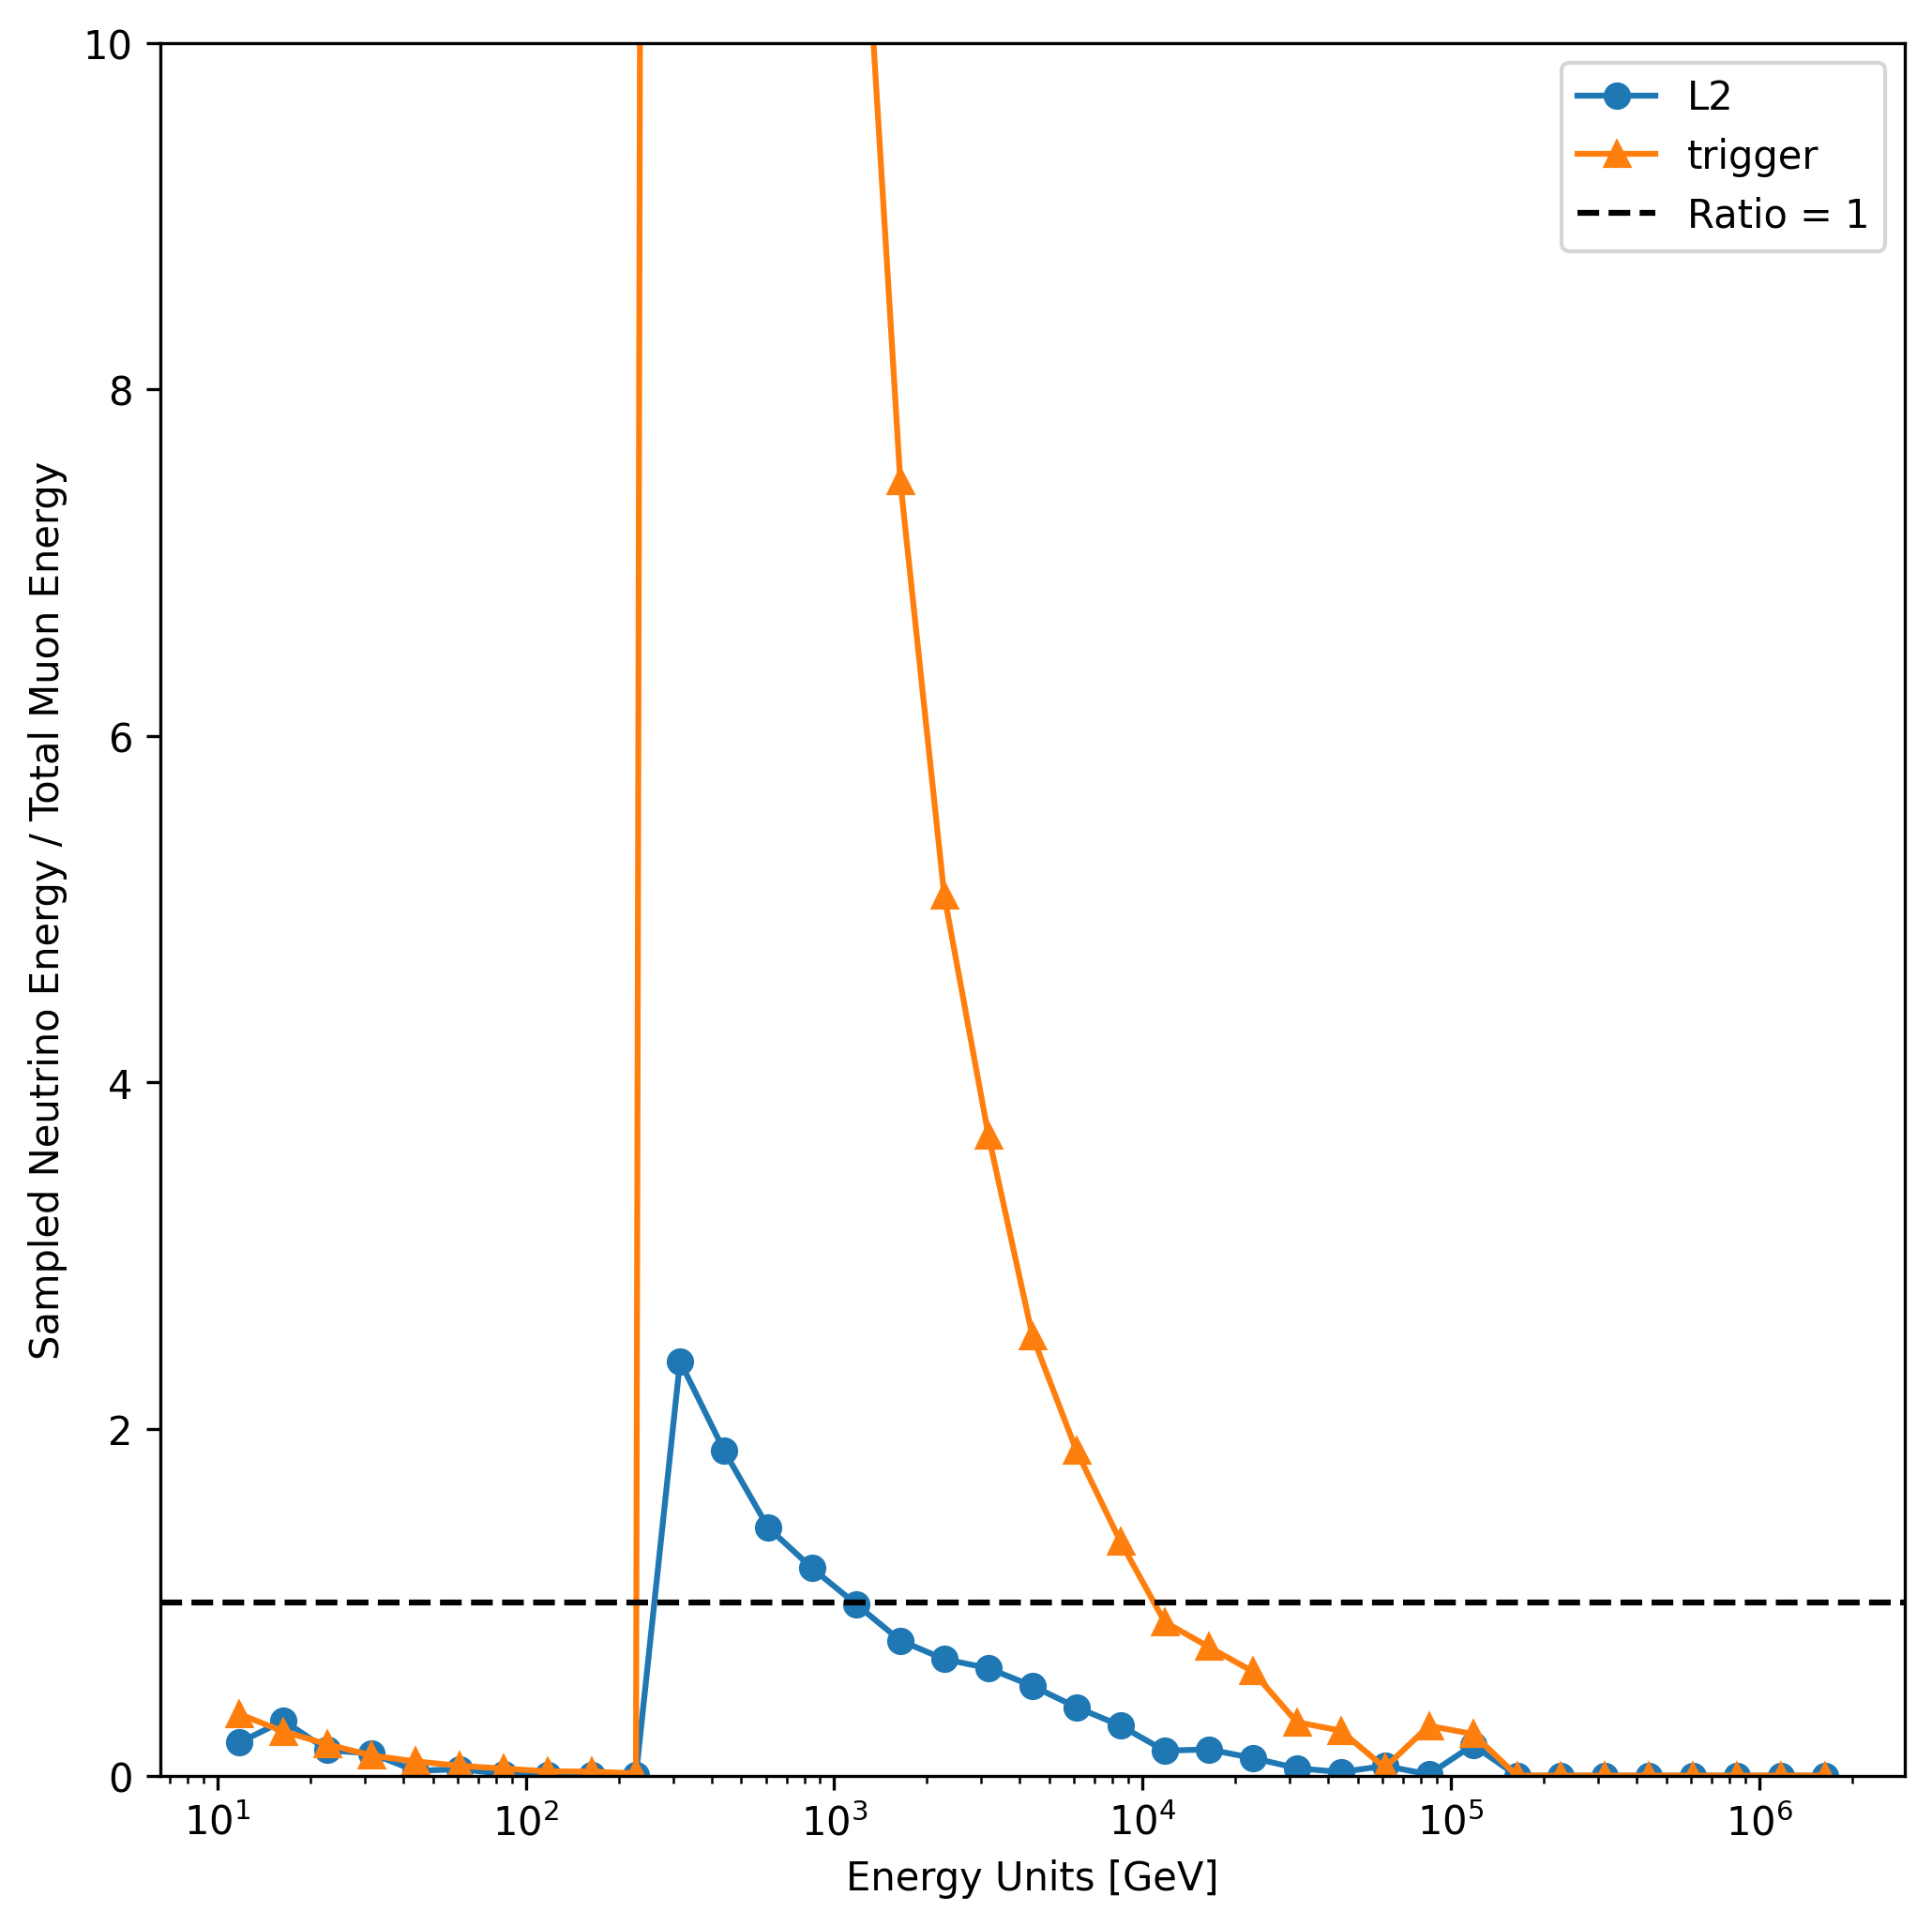

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the ratio of 'sampled neutrino energy' to 'total muon energy'
ratio = np.divide(np.histogram(neutrino_energy, bins=bins, weights=weights)[0],
                  np.histogram(total_muon_energy, bins=bins, weights=weights)[0])

pratio = np.divide(np.histogram(pneutrino_energy, bins=bins, weights=pweights)[0],
                  np.histogram(ptotal_muon_energy, bins=bins, weights=pweights)[0])
# Plot the ratio
plt.figure(figsize=(8, 8), dpi=300)
plt.plot(bin_centers, ratio, label='L2',marker='o')
plt.plot(bin_centers, pratio, label='trigger',marker='^')
plt.axhline(y=1, color='k', linestyle='--', label='Ratio = 1')
plt.xscale('log')
plt.xlabel("Energy Units [GeV]")
plt.ylabel("Sampled Neutrino Energy / Total Muon Energy")
plt.legend()
plt.ylim(0,10)
plt.show()


27.590198774432
0.0


/tmp/ipykernel_7615/4126118348.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  im.set_cmap(plt.cm.get_cmap('turbo', len(e_bins)))


Text(0, 0.5, 'z[m]')

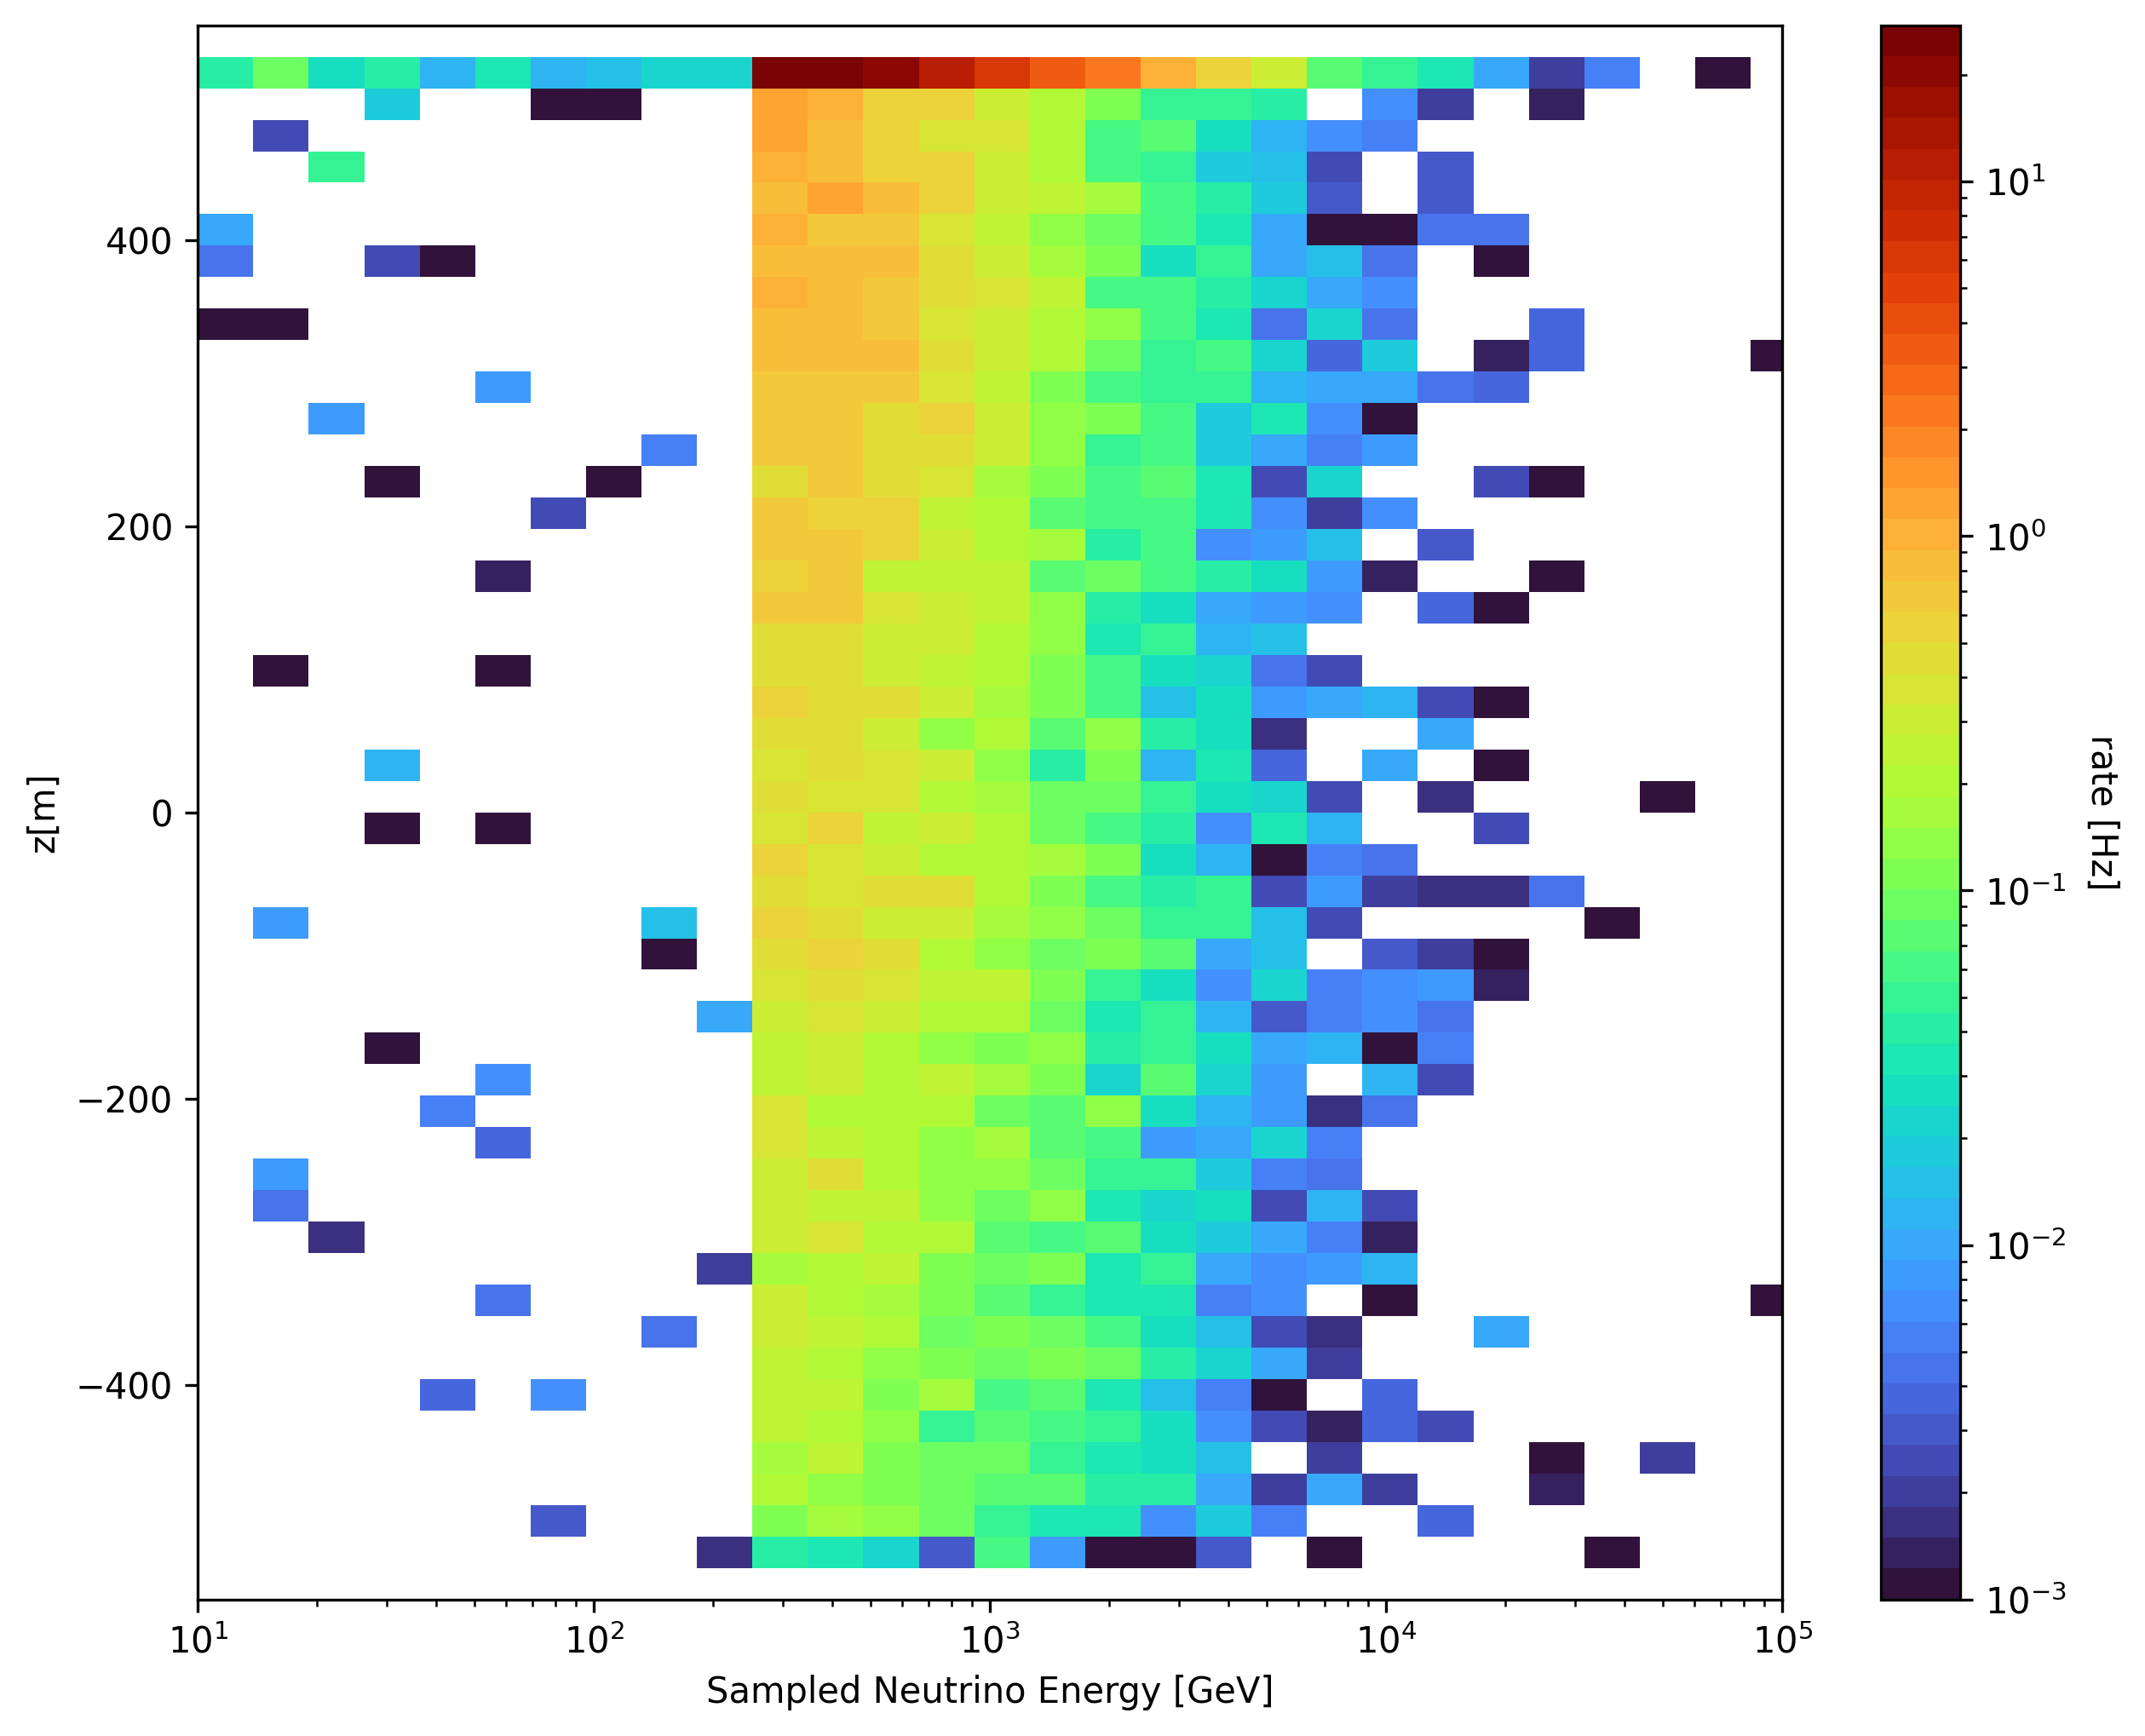

In [71]:
####check for stopping neutrinos
from matplotlib.colors import LogNorm
d_bins = np.linspace(-550,550,51)
e_bins = np.logspace(1,8,51)
e_ticks = [10**-4,10**-3,10**-2,10**-1,0,10**1,10**2,10**3,10**4,10**5,10**6]
neutrino_z = [1948.5 - val for val in neutrino_depth]
hist2D,_,_ = np.histogram2d(neutrino_energy,
                            neutrino_z,
                            bins=[e_bins,d_bins], weights = weights)
f, ax = plt.subplots(1,1,figsize=(10,8), dpi = 300)
print(hist2D.max())
print(hist2D.min())
im=ax.pcolormesh(e_bins, d_bins,hist2D.T,cmap='turbo',
                 norm=LogNorm(vmin=0.001, vmax=max_count))
im.set_cmap(plt.cm.get_cmap('turbo', len(e_bins)))
cbar = f.colorbar(im)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('rate [Hz]', rotation=270)
ax.set_xscale('log')
ax.set_xlim(10**1,10**5)
#ax.set_ylim(1900,2000)
ax.set_xlabel('Sampled Neutrino Energy [GeV]')
ax.set_ylabel('z[m]')
#ax.set_title('Airshowers from Corsika 20904')
#ax.set_yticks(ticks=e_ticks)